<span style="color:black; font-size:35px;"><strong>Mini Project</strong></span>


<span style="color:green; font-size:21px;"><strong>**Domain:**</strong> Lifestyle</span>

<span style="color:green; font-size:21px;">**Topic:** Sleep Quality Prediction</span>


<span style="color:black; font-size:20px;"><strong>Team Mates:</strong> Nivas, Dhanushree</span>

**Sleep Quality Ratings**

- **Rating 4:** Poor, affects health.
- **Rating 5:** Fair, room for improvement.
- **Rating 6:** Average, some interruptions.
- **Rating 7:** Good, healthier life.
- **Rating 8:** Very Good, boosts health.
- **Rating 9:** Excellent, active lifestyle.
- **Rating 10:** Outstanding, peak well-being.


<span style="color:black; font-size:35px;"><strong>1. Data Prepocessing</strong></span>


### 1a. Detecting Missing Values and imputation

In [1]:
import pandas as p
import matplotlib.pyplot as m
import seaborn as s

da=p.read_csv("C:\\Users\\reddy\\Desktop\\Sleep_Health.csv")
da.info()
print("\nMissing Values:\n\n",da.isna().sum())

da.fillna(0,inplace=True)

print("\nMissing Values:\n\n",da.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB

Missing Values:

 Per

<span style="color:black; font-size:35px;"><strong>1b. Outlier Detection</strong></span>


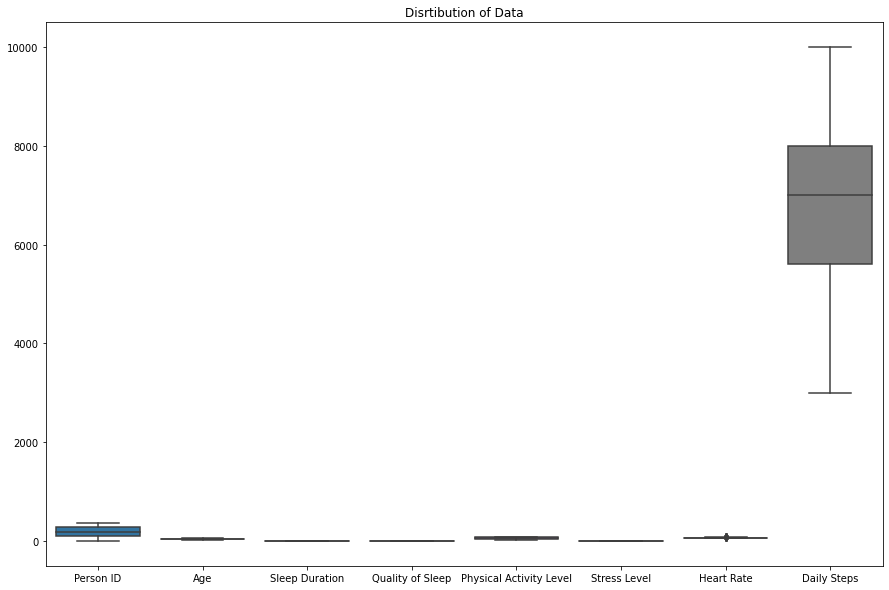

In [2]:
#Outlier Detection
m.figure(figsize=(15,10))
s.boxplot(data=da)
m.title('Disrtibution of Data')
m.show()

<span style="color:black; font-size:35px;"><strong>1c. Duplicate Detection and removal</strong></span>


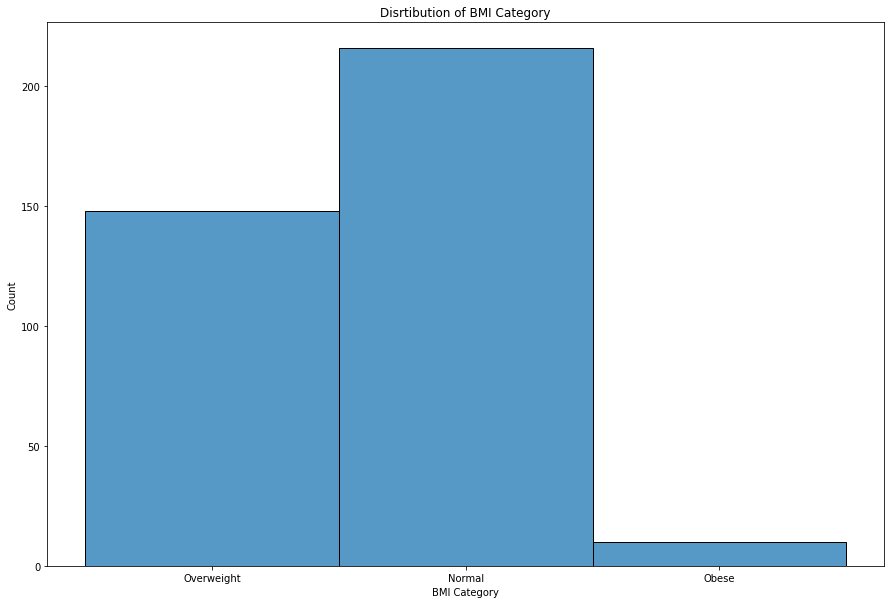

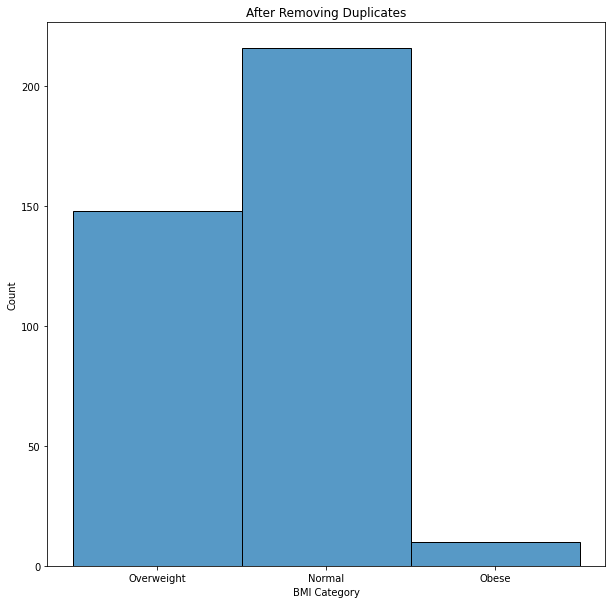

In [4]:
m.figure(figsize=(15,10))
s.histplot(da['BMI Category'])
m.title('Disrtibution of BMI Category')
m.show()

#Duplicates
da['BMI Category']=da['BMI Category'].str.strip()
da.to_csv("C:\\Users\\reddy\\Desktop\\Sleep_health1.csv", index=False)

m.figure(figsize=(10,10))
s.histplot(da['BMI Category'])
m.title('After Removing Duplicates')
m.show()

<span style="color:black; font-size:35px;"><strong>2. Data Exploration</strong></span>


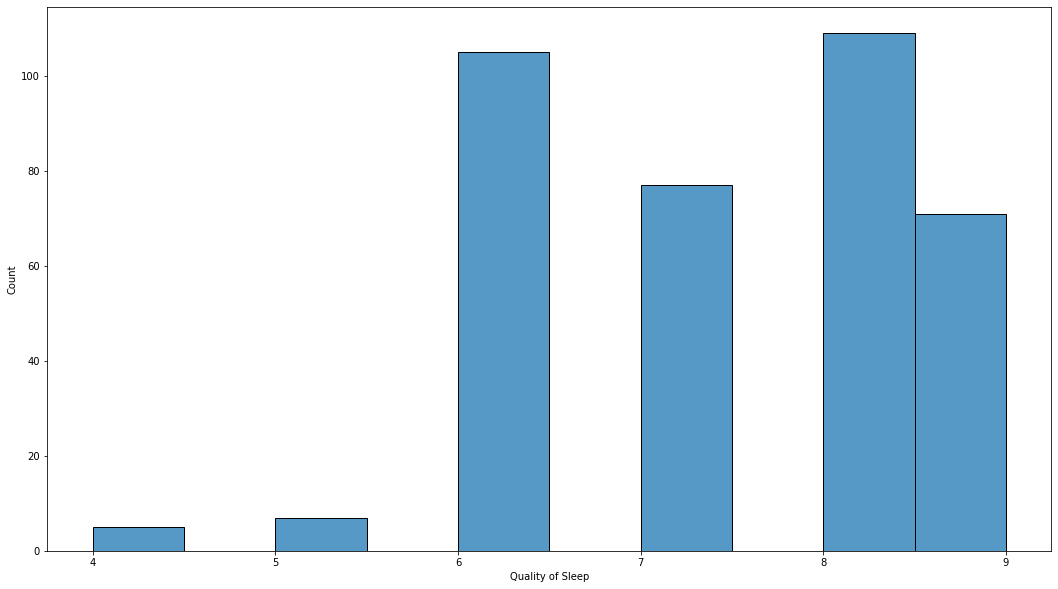

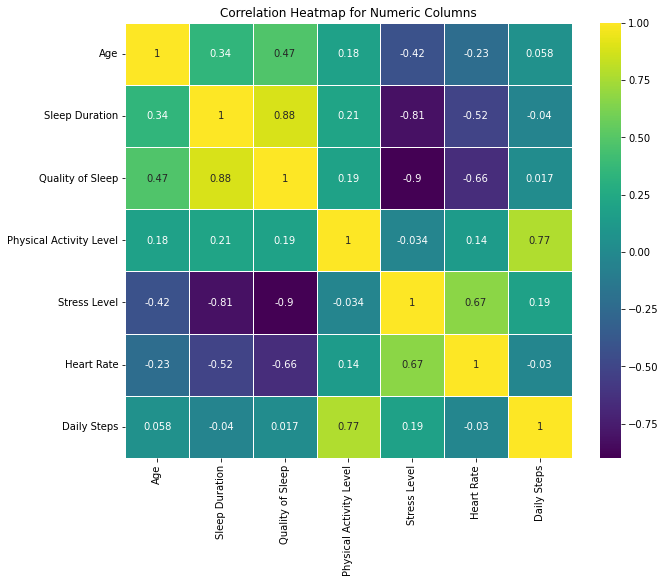

C:\Users\reddy\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


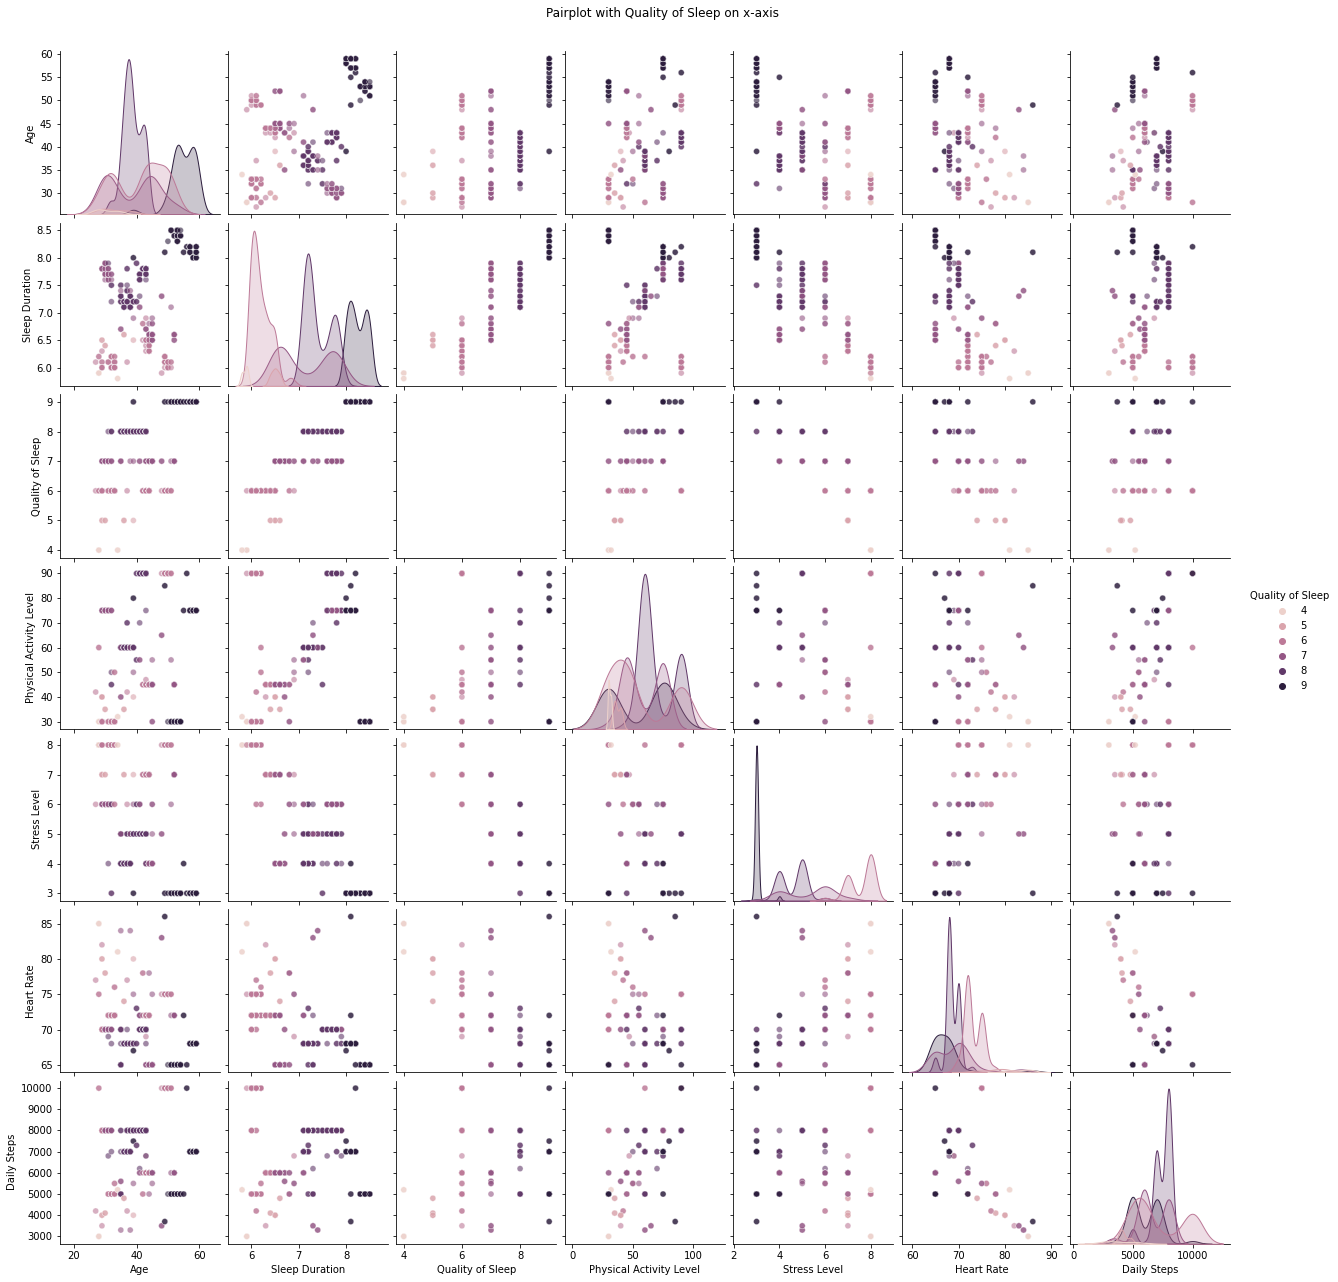

In [43]:
m.figure(figsize=(18,10))
s.histplot(da['Quality of Sleep'])
m.show()

numeric_columns = da[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]
m.figure(figsize=(10, 8))
s.heatmap(numeric_columns.corr(), annot=True, cmap="viridis", linewidths=0.5)
m.title('Correlation Heatmap for Numeric Columns')
m.show()

s.pairplot(data=da, vars=numeric_columns, diag_kind='kde', markers='o', hue='Quality of Sleep', plot_kws={'alpha':0.6})
m.suptitle('Pairplot with Quality of Sleep on x-axis', y=1.02)
m.show()

<span style="color:black; font-size:35px;"><strong>3. Model Build and Evaluation</strong></span>


Mean Squared Error: 0.1792526896083644

R-squared (R2): 0.8811811950215591


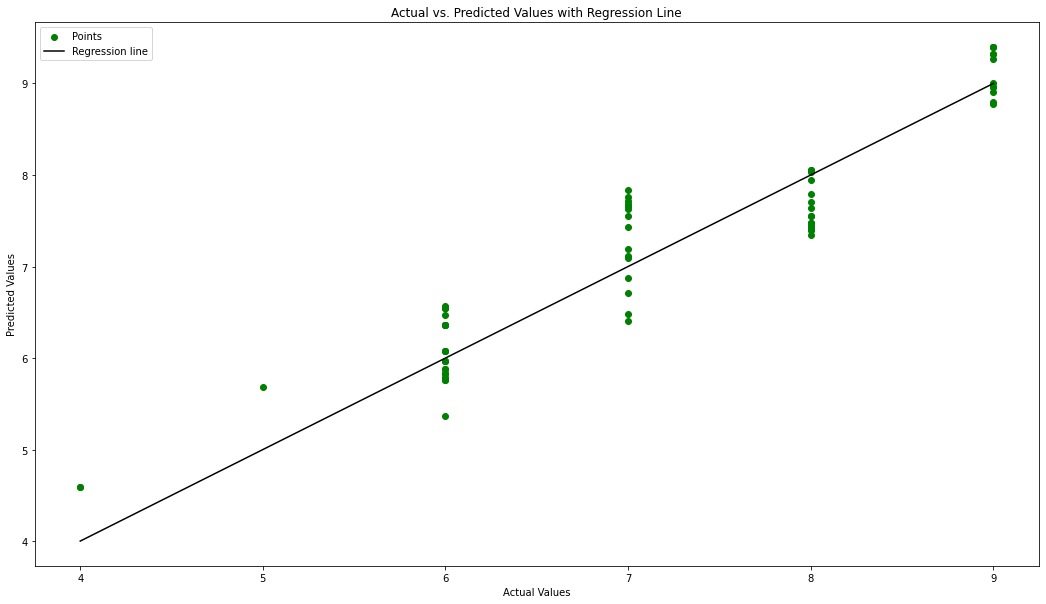

In [64]:
import numpy as n
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x = da[['Sleep Duration','Heart Rate','Age']]
y = da['Quality of Sleep']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:',mse)
print('\nR-squared (R2):',r2)

m.figure(figsize=(18, 10))
m.scatter(y_test, y_pred,c='green')
m.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='k')
m.xlabel("Actual Values")
m.ylabel("Predicted Values")
m.legend(['Points','Regression line'])
m.title("Actual vs. Predicted Values with Regression Line")
m.show()

<span style="color:black; font-size:35px;"><strong>4. Working and Prediction</strong></span>


In [75]:
import pandas as pd

sd = float(input('Enter Sleep Duration: '))
hr = float(input('Enter Heart Rate: '))
age = float(input('Enter Age: '))

inp=pd.DataFrame([[sd, hr, age]], columns=['Sleep Duration', 'Heart Rate', 'Age'])
res=model.predict(inp)
print("Predicted Quality of Sleep:", res[0])

Predicted Quality of Sleep: 7.03716844791475


<span style="color:black; font-size:35px;"><strong>**Sleep Quality Ratings**</strong>




- **Rating 4:** Poor, affects health.
- **Rating 5:** Fair, room for improvement.
- **Rating 6:** Average, some interruptions.
- **Rating 7:** Good, healthier life.
- **Rating 8:** Very Good, boosts health.
- **Rating 9:** Excellent, active lifestyle.
- **Rating 10:** Outstanding, peak well-being.
</span>